### Problem Statement: 
**tries to predict which class it belongs to: low/bad-quality wine, or high/good-quality wine. Some classifiers used for wine quality**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df = pd.read_csv('WineQT.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


**Unserstanding the dataset**

In [4]:
### Shape of dataset
df.shape

(1143, 13)

In [5]:
###  gives datatype 
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

- **Fixed Acidity:** are non-volatile acids that do not evaporate readily

- **Volatile Acidity:** are high acetic acid in wine which leads to an unpleasant vinegar taste

- **Citric Acid:** acts as a preservative to increase acidity. When in small quantities, adds freshness and flavor to wines

- **Residual Sugar:** is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. It is important to note that wines > 45g/ltrs are sweet

- **Chlorides:** the amount of salt in the wine

- **Free Sulfur Dioxide:** it prevents microbial growth and the oxidation of wine

- **Total Sulfur Dioxide:** is the amount of free + bound forms of SO2

- **Density:** sweeter wines have a higher density

- **pH:** describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale

- **Alcohol:** available in small quantities in wines makes the drinkers sociable

- **Sulphates:** a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant

- **Quality:** which is the output variable/predictor

In [6]:
### gives all the information of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


- **observations:**

- The quality of wine varies from 3 to 8, where 6 is the average quality.
- The maximum alcohol level in the wine is 14.9 and minimum is 8.4
- The pH level of wine varies between 2.74 to 4.01.
- The average density of wine is 0.9956.
- Total sulpher dioxide varies between 6.0 to 289.0.

In [8]:
## We dont need id featurs so lets drop it
df.drop('Id', axis=1, inplace=True)

In [9]:
df.shape

(1143, 12)

**Checking for missing values**

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- There are no missing values are in this dataset.

### Exploratory Data Analysis(EDA)

In [11]:
df['quality'].value_counts(normalize=True)*100

5    42.257218
6    40.419948
7    12.510936
4     2.887139
8     1.399825
3     0.524934
Name: quality, dtype: float64

- We can see the imbalnce in this dataset. The number of values are greater for 5 and 6 follwed by 7.

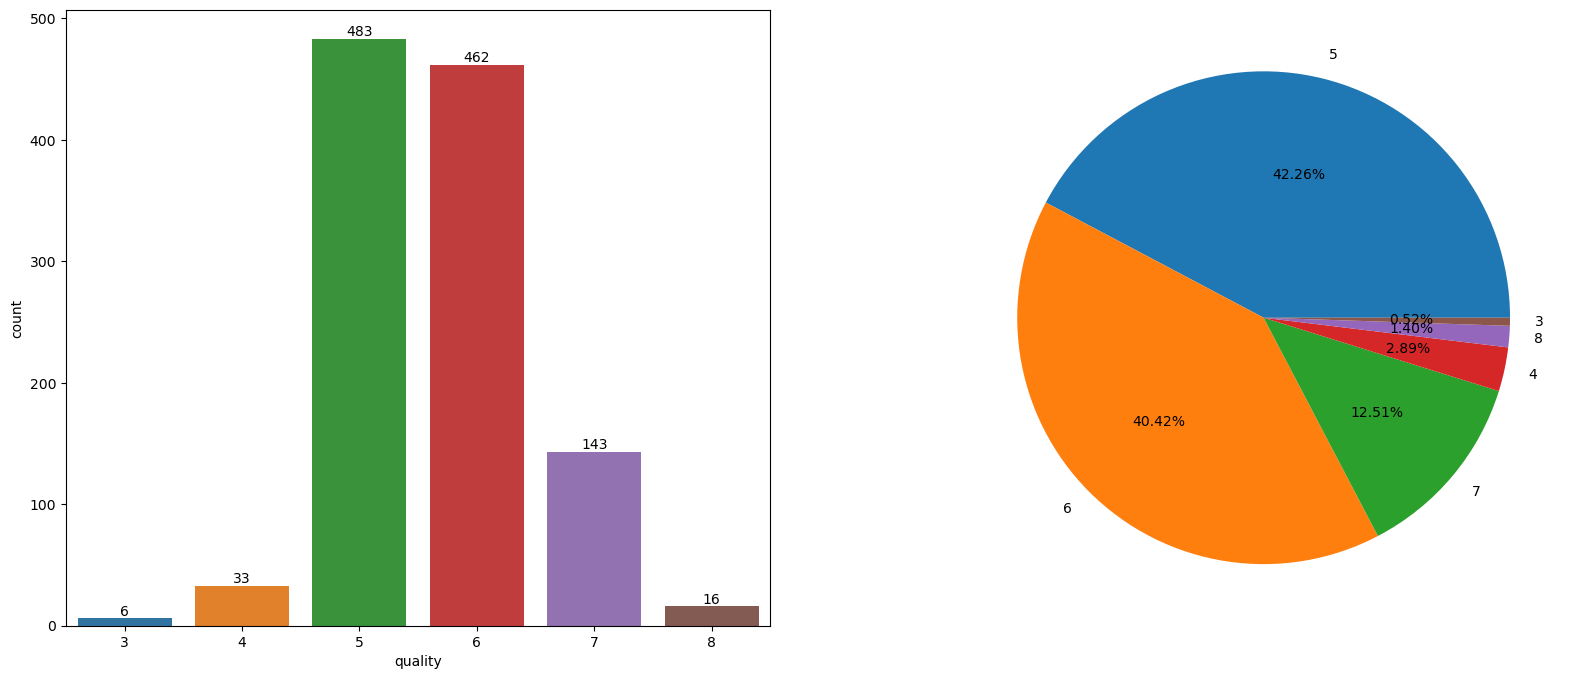

In [12]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
ax = sns.countplot(x = df['quality'], data =df)
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(1,2,2)
target_val = df['quality'].value_counts().values
target_name = df['quality'].value_counts().index
plt.pie(x=target_val, labels=target_name, autopct = '%1.2f%%')
plt.show()

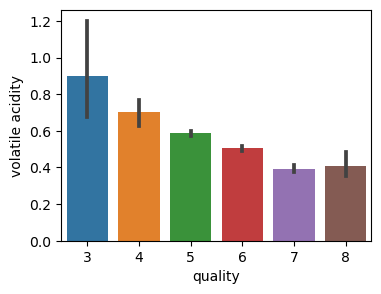

In [13]:
### Volatile acidity vs Quality
plt.figure(figsize=(4,3))
sns.barplot(x='quality', y='volatile acidity', data=df);

- **Observations:** We can see that for good quality of wine the volatile acidity should be low, that means both are inversely proportional to each other. for the good quality wine the volatile acidity is in range between 0.3 to 0.5.

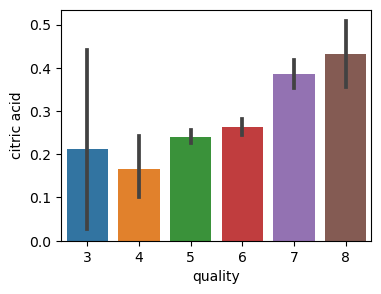

In [14]:
### Volatile acidity vs Quality
plt.figure(figsize=(4,3))
sns.barplot(x='quality', y='citric acid', data=df);

- **Observations:** For a good quality wine the concentration of citric acid to be more that means wine quality and and citric acid are positively correlated to each other.

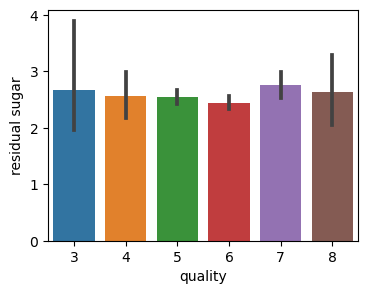

In [15]:
### residual sugar vs Quality
plt.figure(figsize=(4,3))
sns.barplot(x='quality', y='residual sugar', data=df);

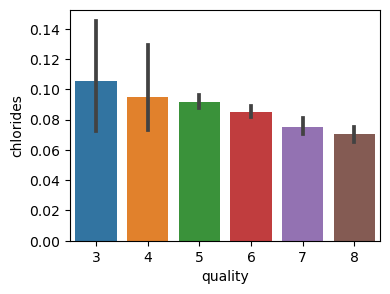

In [16]:
### chlorides vs Quality
plt.figure(figsize=(4,3))
sns.barplot(x='quality', y='chlorides', data=df);

- for good quality of wine the chloride concentartion are in range b/w 0.7-0.9.

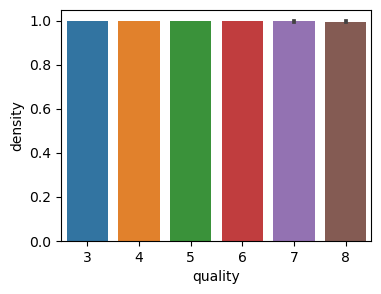

In [17]:
### density vs Quality
plt.figure(figsize=(4,3))
sns.barplot(x='quality', y='density', data=df);

- For wine to be sweeter, the density should be higher. in the good quality of wine the density is about 0.99.

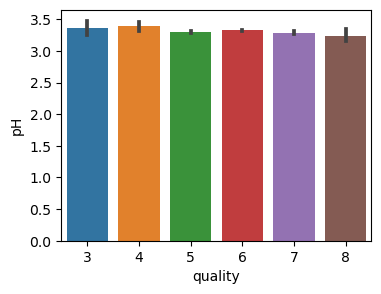

In [18]:
### pH vs Quality
plt.figure(figsize=(4,3))
sns.barplot(x='quality', y='pH', data=df);

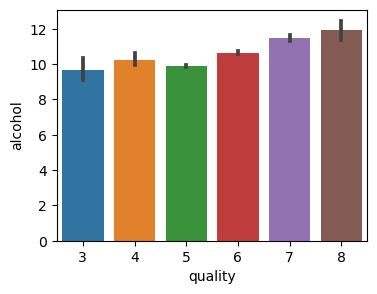

In [19]:
### alcohol vs Quality
plt.figure(figsize=(4,3))
sns.barplot(x='quality', y='alcohol', data=df);

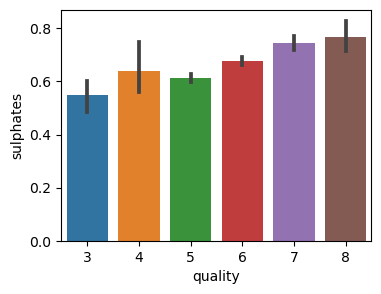

In [20]:
### alcohol vs Quality
plt.figure(figsize=(4,3))
sns.barplot(x='quality', y='sulphates', data=df);

In [21]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

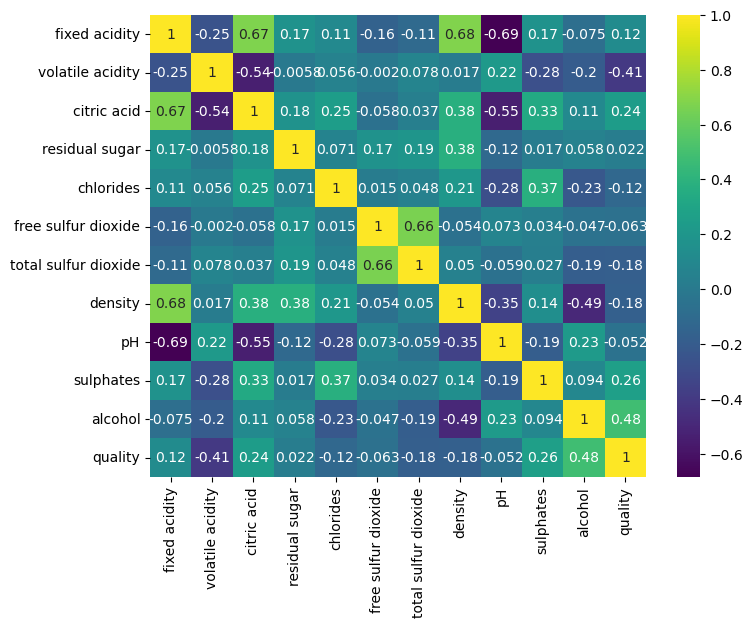

In [22]:
### Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis');

**Observations:**
- Alcohol, sulphates and critic acid are positively correlated with the quality of the red wine.
- Alcohol has a  positive correlation with the pH value and negatively correlated with density.
- Volatile acidty, chlorides and density are negatively correlated with quality.

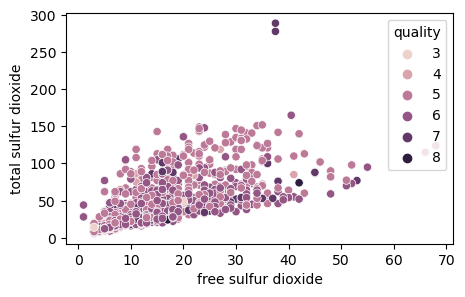

In [23]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', hue='quality', data=df);

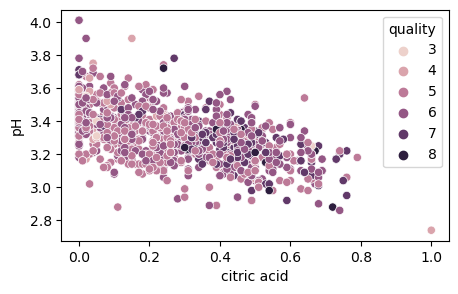

In [24]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='citric acid', y='pH', hue='quality', data=df);

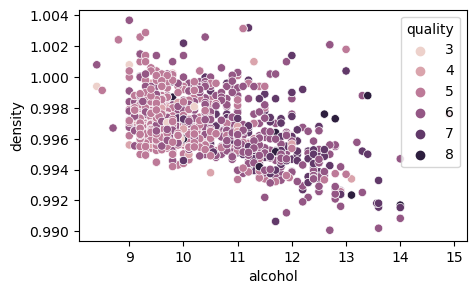

In [25]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='alcohol', y='density',hue='quality', data=df);

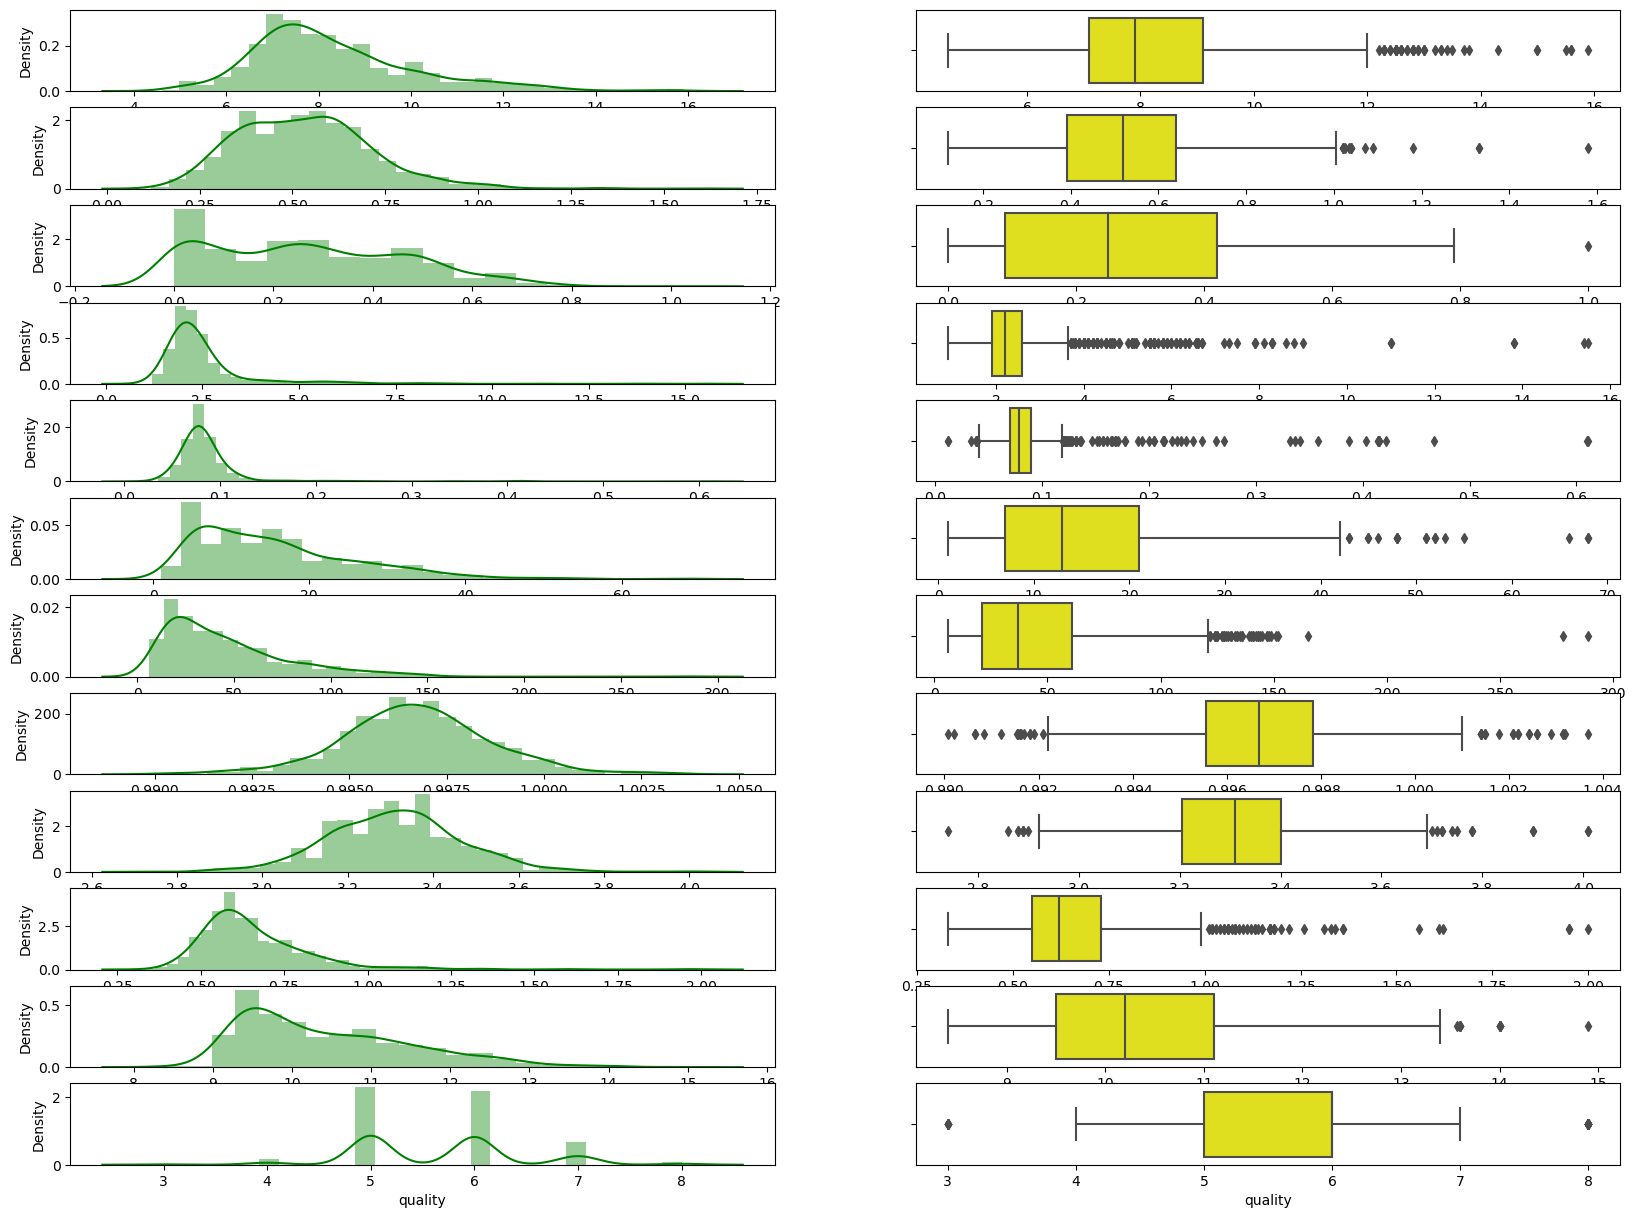

In [26]:
fig,ax = plt.subplots(12,2,figsize=(20,15))
for index,i in enumerate(df.columns):
    sns.distplot(df[i],ax=ax[index,0],color='green')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow')

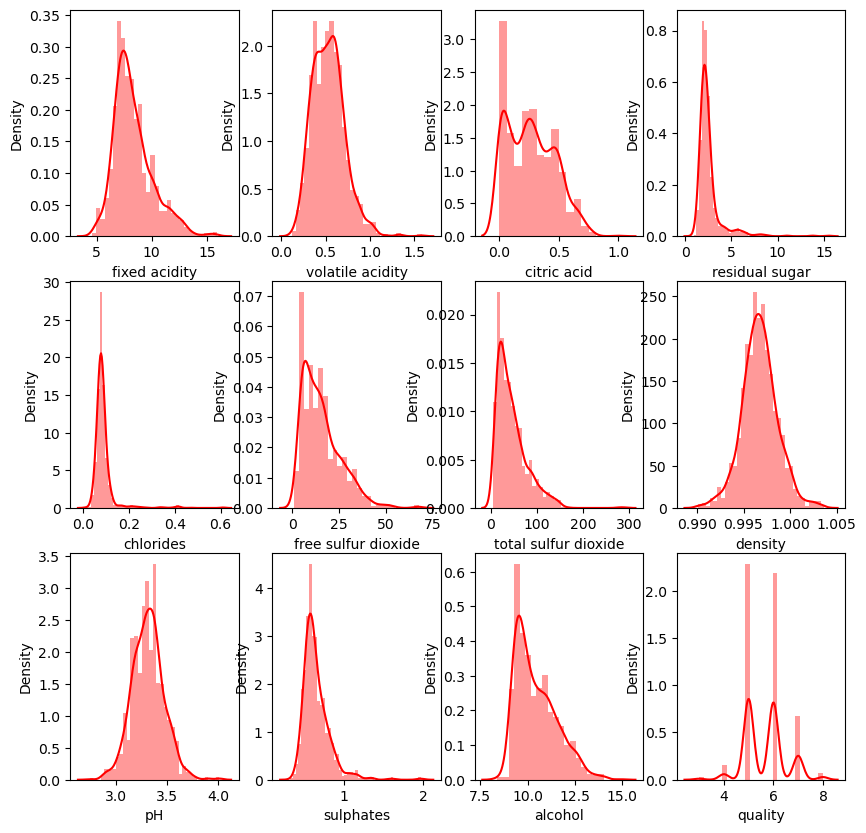

In [27]:
color = sns.color_palette("pastel")
fig, ax1 = plt.subplots(3,4, figsize=(10,10))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1
plt.show()

In [28]:
df['residual sugar'] = np.log(df['residual sugar']+ 0.01)
df['chlorides'] = np.log(df['chlorides']+0.01)
df['free sulfur dioxide'] = np.log(df['free sulfur dioxide']+0.01)
df['total sulfur dioxide'] = np.log(df['total sulfur dioxide']+0.01)
df['sulphates'] = np.log(df['sulphates']+0.01)

<Figure size 600x400 with 0 Axes>

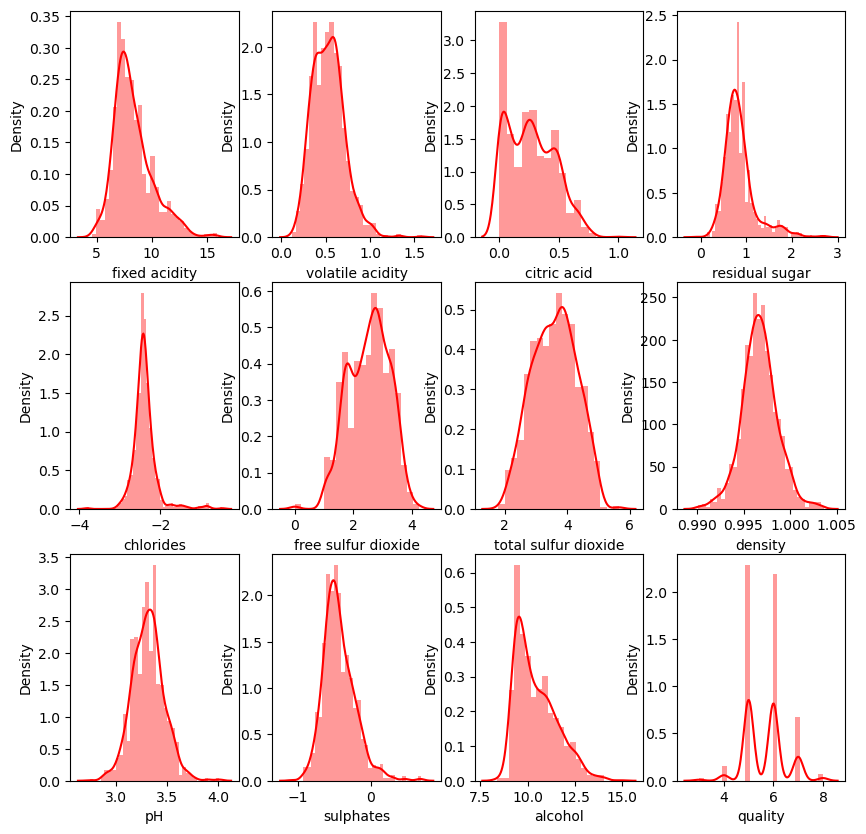

In [29]:
color = sns.color_palette("pastel")
plt.figure(figsize=(6,4))
fig, ax1 = plt.subplots(3,4, figsize=(10,10))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1
plt.show()

In [30]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.647103,-2.453408,2.398804,3.526655,0.9978,3.51,-0.562119,9.4,5
1,7.8,0.88,0.00,0.959350,-2.225624,3.219276,4.204842,0.9968,3.20,-0.371064,9.8,5
2,7.8,0.76,0.04,0.837248,-2.282782,2.708717,3.989169,0.9970,3.26,-0.415515,9.8,5
3,11.2,0.28,0.56,0.647103,-2.465104,2.833801,4.094511,0.9980,3.16,-0.527633,9.8,6
4,7.4,0.70,0.00,0.647103,-2.453408,2.398804,3.526655,0.9978,3.51,-0.562119,9.4,5


In [31]:
df['best quality'] = [1 if x > 6 else 0 for x in df.quality]

In [32]:
df.drop('quality', axis=1, inplace=True)

In [33]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,7.4,0.70,0.00,0.647103,-2.453408,2.398804,3.526655,0.9978,3.51,-0.562119,9.4,0
1,7.8,0.88,0.00,0.959350,-2.225624,3.219276,4.204842,0.9968,3.20,-0.371064,9.8,0
2,7.8,0.76,0.04,0.837248,-2.282782,2.708717,3.989169,0.9970,3.26,-0.415515,9.8,0
3,11.2,0.28,0.56,0.647103,-2.465104,2.833801,4.094511,0.9980,3.16,-0.527633,9.8,0
4,7.4,0.70,0.00,0.647103,-2.453408,2.398804,3.526655,0.9978,3.51,-0.562119,9.4,0


**X & y**

In [34]:
X = df.drop('best quality', axis=1)
y = df['best quality']

In [35]:
print(X.shape, y.shape)

(1143, 11) (1143,)


### Feature Importance

In [36]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X, y)
mutual_info

array([0.05260981, 0.08126122, 0.0690491 , 0.        , 0.03935705,
       0.0153704 , 0.04439011, 0.02405035, 0.02492896, 0.04957299,
       0.10413973])

In [37]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

alcohol                 0.104140
volatile acidity        0.081261
citric acid             0.069049
fixed acidity           0.052610
sulphates               0.049573
total sulfur dioxide    0.044390
chlorides               0.039357
pH                      0.024929
density                 0.024050
free sulfur dioxide     0.015370
residual sugar          0.000000
dtype: float64

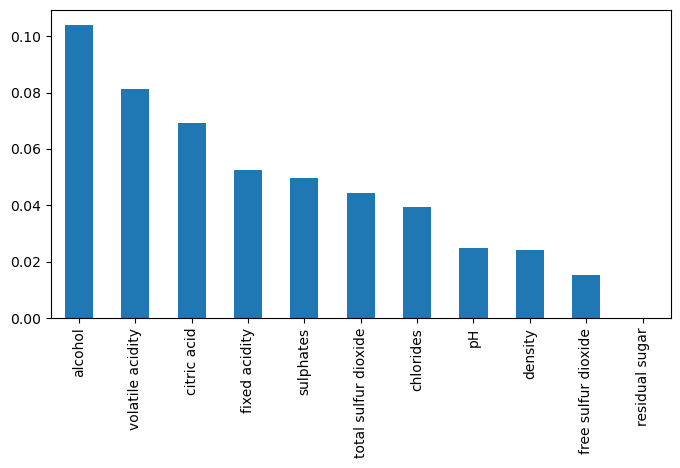

In [38]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(8, 4))
plt.show()

In [39]:
df['best quality'].value_counts(normalize=True)*100

0    86.089239
1    13.910761
Name: best quality, dtype: float64

- The dataset is imbalenced, so will do oversampling of minority class by SMOTE technique.

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_new, y_new = smote.fit_resample(X,y)

print('dataset shape before smote:')
print(y.value_counts())
print('-------------------------------------')
print('dataset shape after smote:')
print(y_new.value_counts())

dataset shape before smote:
0    984
1    159
Name: best quality, dtype: int64
-------------------------------------
dataset shape after smote:
0    984
1    984
Name: best quality, dtype: int64


### Modelling and Evaluation

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [42]:
##Creating a function to calculate best model for this problem
def find_best_model(X,y):
    models = {'logistic_regression':{'model':LogisticRegression(), 'parameters':{'penalty' : ['l1', 'l2', 'elasticnet', 'none']}},
             
             'decision_tree':{'model':DecisionTreeClassifier(random_state=0), 'parameters':{'criterion':['gini','entropy'],'max_depth':[1,2,3,4]}},
             
             'random_forest':{'model':RandomForestClassifier(random_state=0), 'parameters':{'n_estimators':[5,10,15,20,50,60,100]}},
             
              'xg_boost':{'model':XGBClassifier(), 'parameters':{'n_estimators':[10,20,40], 'max_depth':[3,4,5],'gamma':[0,0.3,0.5,1]}},
             
              'ada_boost':{'model':AdaBoostClassifier(), 'parameters':{'n_estimators':[10,20,40,50]}}}
    
    
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X,y)
        scores.append({'model': model_name,'best_parameters':gs.best_params_, 'score':gs.best_score_})
    return pd.DataFrame(scores, columns=['model','best_parameters', 'score'])

find_best_model(X,y)

,model,best_parameters,score
0,logistic_regression,{'penalty': 'none'},0.876622
1,decision_tree,"{'criterion': 'gini', 'max_depth': 2}",0.870497
2,random_forest,{'n_estimators': 100},0.874010
3,xg_boost,"{'gamma': 1, 'max_depth': 5, 'n_estimators': 10}",0.876611
4,ada_boost,{'n_estimators': 10},0.858228


In [43]:
# Using cross_val_score for getting highest accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X,y, cv=5)
print('Cross validation Score:{}%'.format(round(sum(scores)*100/len(scores)),3))

Cross validation Score:87%


In [44]:
### Train test spli
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.02011533,  0.48275706, -0.33958155, ..., -0.93934436,
         2.48007968, -1.24996954],
       [ 0.32140939, -1.40346788,  0.92850774, ..., -0.37163834,
        -0.67232552,  1.70900438],
       [ 1.80134986, -1.02075557,  1.13140202, ...,  0.0699108 ,
         1.55686207,  0.50692122],
       ...,
       [ 0.09372624, -0.36467733,  0.01548345, ..., -0.93934436,
         1.25402545,  0.59938916],
       [-0.47548163, -0.69271645, -0.5931994 , ..., -1.06550126,
        -0.43799194, -1.24996954],
       [-0.41856084,  1.33019145, -1.35405297, ...,  0.00683235,
        -0.14343557,  0.22951742]])

In [46]:
#Creatin LogisticRegression model
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test, y_test)

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Test Accuracy:", accuracy_score(y_test, ypred_test))

Train Accuracy: 0.887308533916849
Test Accuracy: 0.8646288209606987


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred_test)

array([[191,   6],
       [ 25,   7]], dtype=int64)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       197
           1       0.54      0.22      0.31        32

    accuracy                           0.86       229
   macro avg       0.71      0.59      0.62       229
weighted avg       0.84      0.86      0.84       229



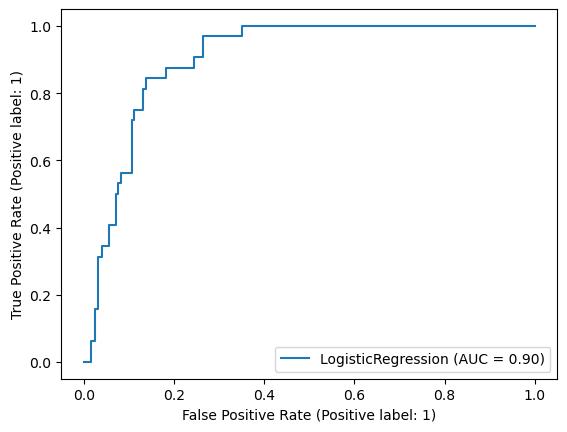

In [49]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,y_test)
plt.show()

In [50]:
import pickle
#create a file, where we want to save the model
file = open('wine_lr.pkl','wb')

#Dump the inforamtion to the file we created
pickle.dump(model, file)